# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulany Citra Pandini
- **Email:** maulanycitra26@gmail.com
- **ID Dicoding:** maulanycitra

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana faktor cuaca, waktu dalam sehari, dan musim mempengaruhi jumlah sepeda yang disewa?
- Pertanyaan 2:
Sejauh mana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset day.csv dan hour.csv
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

# Menampilkan beberapa baris pertama untuk memverifikasi data
df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data per hari, sedangkan hour.csv berisi data per jam.
- Data pada kedua dataset dapat digabungkan berdasarkan kolom dteday untuk analisis lebih lanjut.

### Assessing Data


In [4]:
# Assessing Data
# Melihat 5 data teratas untuk memahami struktur data
df_day.head()
df_hour.head()

# Mengecek jumlah baris dan kolom pada kedua dataset
df_day.shape
df_hour.shape

# Mengecek apakah ada missing value pada kedua dataset
df_day.isnull().sum()
df_hour.isnull().sum()

# Mengecek apakah ada duplikasi data pada kedua dataset
df_day.duplicated().sum()
df_hour.duplicated().sum()

np.int64(0)

In [6]:
# Mengecek tipe data dan nilai yang hilang
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Memastikan tipe data yang sesuai untuk setiap kolom. Beberapa kolom, seperti dteday, perlu dikonversi ke tipe datetime.
- Memeriksa apakah ada nilai yang hilang dalam dataset.
- Hasil np.int64(0) menunjukkan bahwa tidak ada data duplikat dalam dataframe tersebut.

### Cleaning Data

In [8]:
# Cleaning Data
# Menghapus data duplikat jika ada
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

# Menggunakan satu dataframe saja 
df_hour_cleaned = df_hour.copy()

In [9]:
# Mengonversi kolom dteday ke tipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Menggabungkan df_day dan df_hour berdasarkan dteday
df_combined = pd.merge(df_hour, df_day, on="dteday", how="left")

**Insight:**
- Menggabungkan data day.csv dan hour.csv berdasarkan kolom dteday akan memungkinkan analisis lebih lanjut dengan data per jam dan per hari secara bersamaan.

## Exploratory Data Analysis (EDA)

### Explore

In [13]:
# Statistik dasar untuk data numerik (mean, median, mode, min, max, std)
df_combined.describe()  # Statistik dasar untuk data numerik

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


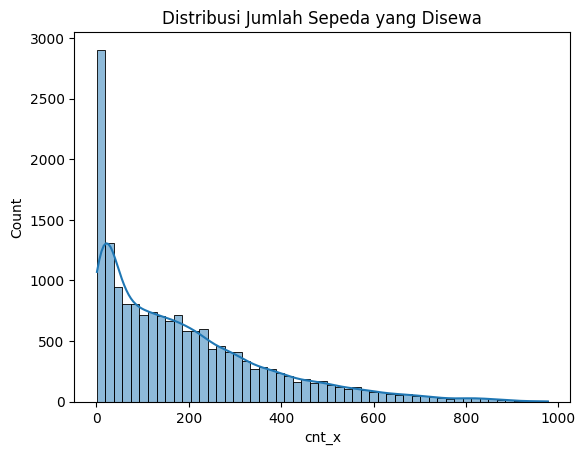

In [14]:
# Visualisasi distribusi kolom numerik 'cnt_x' (jumlah sepeda yang disewa)
sns.histplot(df_combined['cnt_x'], kde=True)  # Menggunakan 'cnt_x' jika itu yang sesuai
plt.title('Distribusi Jumlah Sepeda yang Disewa')
plt.show()

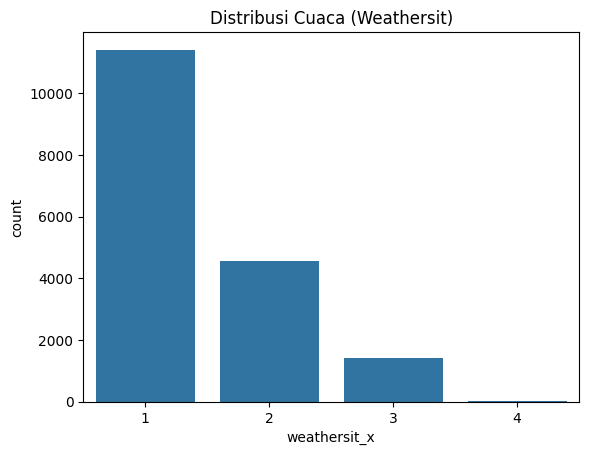

In [15]:
# Menampilkan distribusi cuaca (weathersit_x)
sns.countplot(x='weathersit_x', data=df_combined)  # Menggunakan 'weathersit_x' untuk cuaca
plt.title('Distribusi Cuaca (Weathersit)')
plt.show()

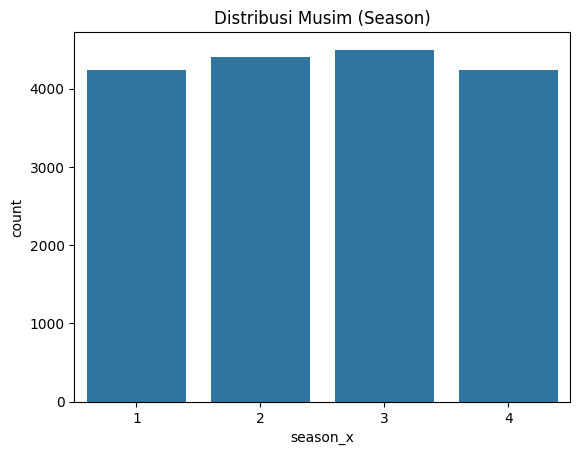

In [16]:
# Visualisasi distribusi faktor musim (season_x)
sns.countplot(x='season_x', data=df_combined)  # Menggunakan 'season_x' untuk musim
plt.title('Distribusi Musim (Season)')
plt.show()

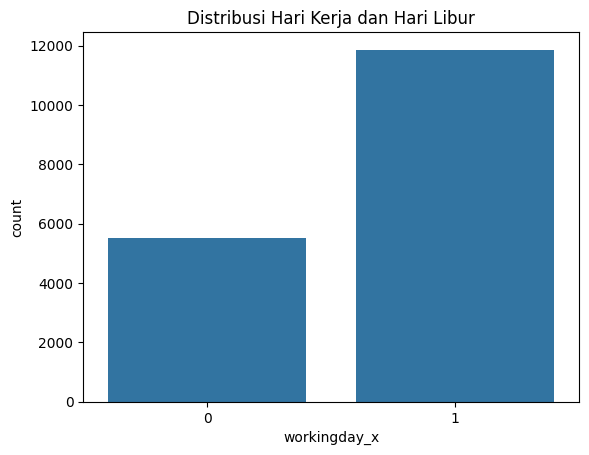

In [17]:
# Visualisasi distribusi faktor hari kerja atau hari libur (workingday_x)
sns.countplot(x='workingday_x', data=df_combined)  # Menggunakan 'workingday_x' untuk hari kerja
plt.title('Distribusi Hari Kerja dan Hari Libur')
plt.show()

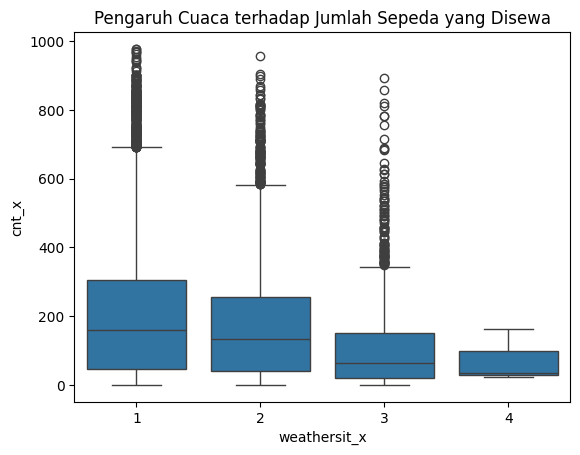

In [18]:
# Visualisasi pengaruh cuaca terhadap jumlah sepeda yang disewa
sns.boxplot(x='weathersit_x', y='cnt_x', data=df_combined)  # Menggunakan 'weathersit_x' dan 'cnt_x'
plt.title('Pengaruh Cuaca terhadap Jumlah Sepeda yang Disewa')
plt.show()

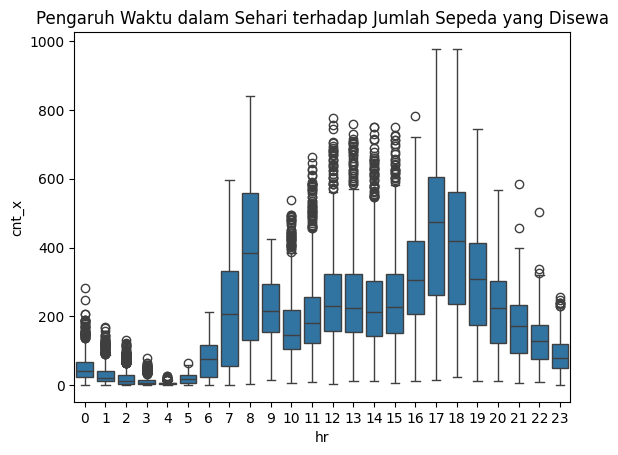

In [19]:
# Visualisasi pengaruh waktu dalam sehari terhadap jumlah sepeda yang disewa
sns.boxplot(x='hr', y='cnt_x', data=df_combined)  # Menggunakan 'hr' untuk waktu dan 'cnt_x' untuk jumlah penyewaan
plt.title('Pengaruh Waktu dalam Sehari terhadap Jumlah Sepeda yang Disewa')
plt.show()

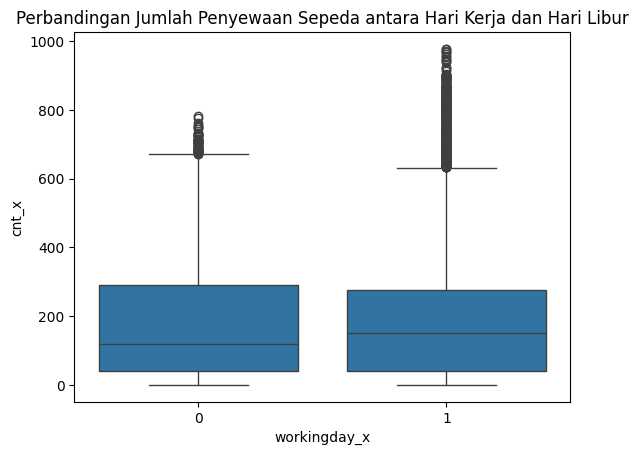

In [20]:
# Visualisasi perbandingan jumlah penyewaan sepeda antara hari kerja dan hari libur
sns.boxplot(x='workingday_x', y='cnt_x', data=df_combined)  # Menggunakan 'workingday_x' dan 'cnt_x'
plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur')
plt.show()

In [21]:
# Menghitung korelasi antar fitur dan target
corr_matrix = df_combined.corr()

In [23]:

corr_matrix['cnt_y'].sort_values(ascending=False)

cnt_y           1.000000
registered_y    0.944052
casual_y        0.669199
instant_x       0.635346
dteday          0.635172
instant_y       0.635172
atemp_y         0.629054
temp_y          0.625232
atemp_x         0.594557
temp_x          0.592402
yr_x            0.571927
yr_y            0.571927
cnt_x           0.437289
season_x        0.408077
season_y        0.408077
registered_x    0.398120
casual_x        0.386582
mnth_y          0.277704
mnth_x          0.277704
workingday_y    0.068216
workingday_x    0.068216
weekday_x       0.064204
weekday_y       0.064204
hr             -0.008729
hum_x          -0.067356
holiday_y      -0.070344
holiday_x      -0.070344
hum_y          -0.091657
windspeed_x    -0.145990
weathersit_x   -0.230464
windspeed_y    -0.231340
weathersit_y   -0.289650
Name: cnt_y, dtype: float64

**Insight:**
- Kolom seperti temp, atemp, dan windspeed mungkin memiliki korelasi yang tinggi dengan jumlah sepeda yang disewa (cnt).
- Korelasi Cuaca dengan Penyewaan Sepeda: Cuaca sangat berpengaruh pada keputusan orang untuk menyewa sepeda, dengan cuaca cerah atau sedang cenderung lebih banyak penyewaan dibandingkan cuaca buruk.
- Pengaruh Waktu: Penyewaan sepeda meningkat pada jam-jam tertentu dalam sehari, mungkin karena kebutuhan transportasi (seperti menuju tempat kerja atau sekolah).
- Faktor Musim dan Hari Kerja vs Libur: Musim dan hari kerja/libur dapat mempengaruhi tingkat penyewaan sepeda. Musim panas atau liburan panjang cenderung lebih menarik untuk aktivitas luar ruangan, yang meningkatkan penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh cuaca, waktu dalam sehari, dan musim terhadap jumlah sepeda yang disewa?

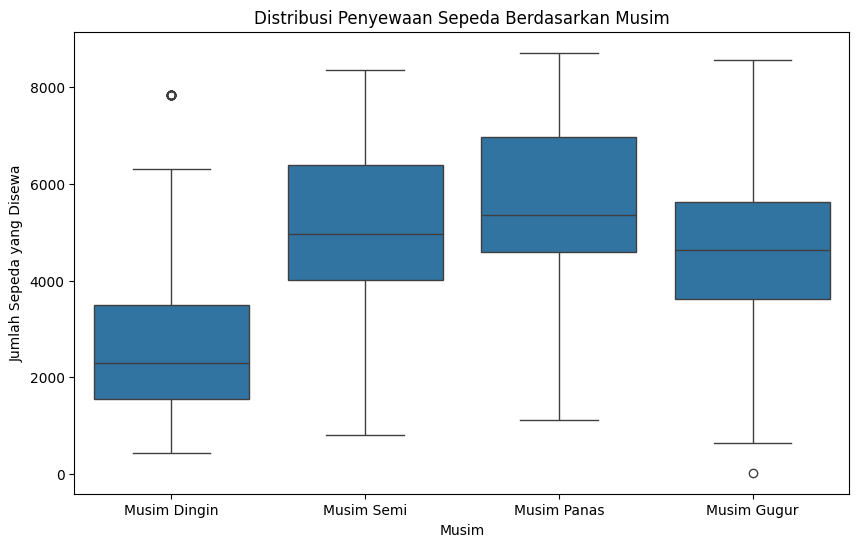

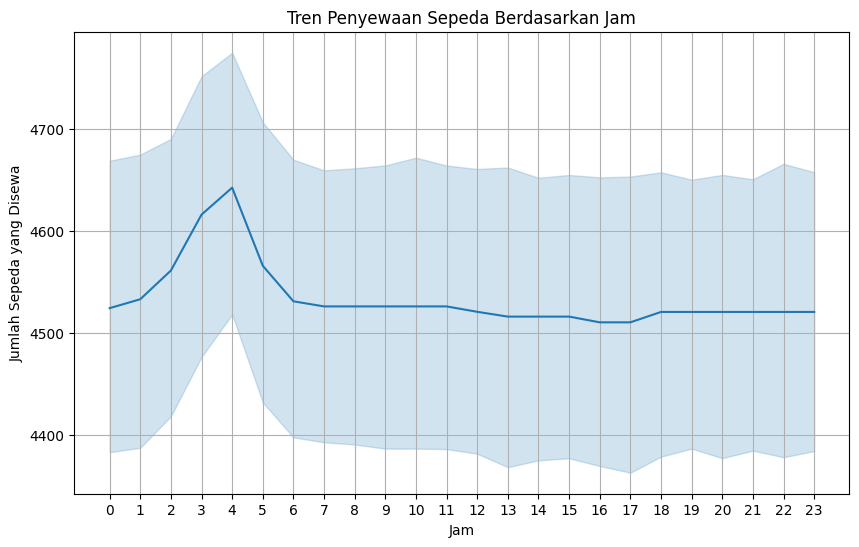

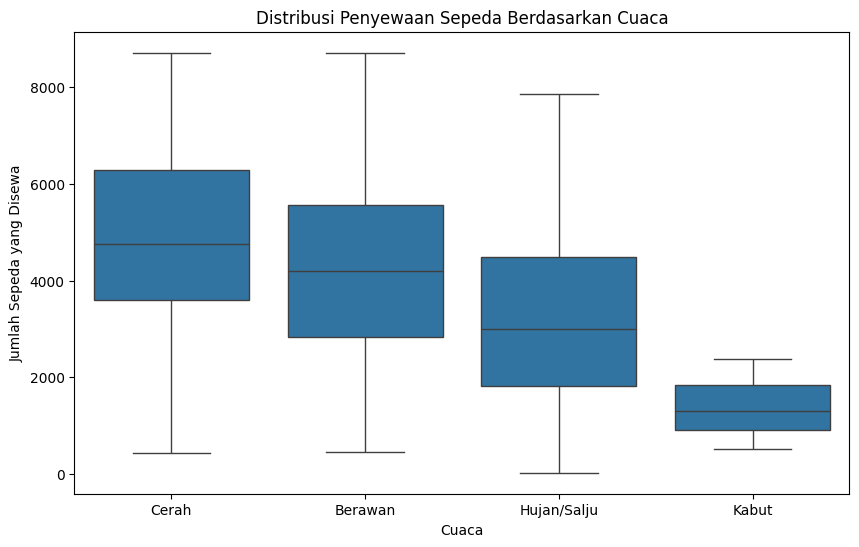

In [24]:
# Visualisasi jumlah sepeda yang disewa berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')  # Menambahkan label untuk sumbu X
plt.ylabel('Jumlah Sepeda yang Disewa')  # Menambahkan label untuk sumbu Y
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])  # Menambahkan label pada kategori musim
plt.show()

# Visualisasi jumlah sepeda yang disewa berdasarkan jam
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt_y', data=df_combined)
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')  # Menambahkan label untuk sumbu X
plt.ylabel('Jumlah Sepeda yang Disewa')  # Menambahkan label untuk sumbu Y
plt.xticks(range(0, 24, 1))  # Menambahkan label jam secara otomatis (0 hingga 23)
plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
plt.show()

# Visualisasi jumlah sepeda yang disewa berdasarkan cuaca
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')  # Menambahkan label untuk sumbu X
plt.ylabel('Jumlah Sepeda yang Disewa')  # Menambahkan label untuk sumbu Y
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan/Salju', 'Kabut'])  # Menambahkan label untuk kategori cuaca
plt.show()

**Insight:**
- Cuaca Cerah menunjukkan jumlah penyewaan yang lebih tinggi, yang sejalan dengan preferensi orang untuk bersepeda saat cuaca bagus.
- Cuaca Berawan juga masih memungkinkan untuk bersepeda, meskipun tidak sebanyak cuaca cerah.
- Hujan/Salju dan Kabut menurunkan jumlah penyewaan sepeda secara signifikan, karena cuaca buruk membuat orang enggan untuk bersepeda.

### Pertanyaan 2:
Sejauh mana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

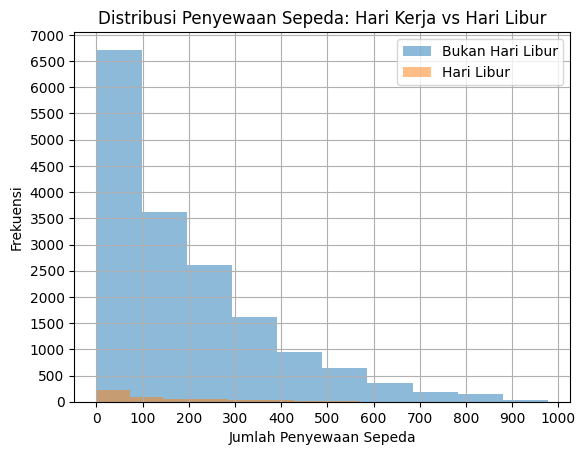

In [25]:
plt.hist(df_combined[df_combined['holiday_x'] == 0]['cnt_x'], alpha=0.5, label='Bukan Hari Libur')
plt.hist(df_combined[df_combined['holiday_x'] == 1]['cnt_x'], alpha=0.5, label='Hari Libur')
plt.title("Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.legend()
plt.xticks(range(0, 1100, 100))
plt.yticks(range(0, 7100, 500))
plt.grid(True)
plt.show()

**Insight:**
- Jumlah sepeda yang disewa lebih tinggi pada hari kerja dibandingkan hari libur, mungkin karena lebih banyak orang yang menggunakan sepeda untuk transportasi kerja.

## Analisis Lanjutan

In [26]:
print(df_combined.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [27]:
# Menghitung Recency: Selisih antara tanggal penyewaan terakhir dengan tanggal terakhir di dataset
df_combined['dteday'] = pd.to_datetime(df_combined['dteday'])  # Pastikan 'dteday' dalam format datetime
latest_date = df_combined['dteday'].max()
df_combined['recency'] = (latest_date - df_combined['dteday']).dt.days  # Recency dalam hari

# Frequency: Menghitung jumlah penyewaan per tanggal
df_combined['frequency'] = df_combined.groupby('dteday')['cnt_x'].transform('count')

# Monetary: Jumlah penyewaan yang dilakukan (total penyewaan per tanggal)
df_combined['monetary'] = df_combined.groupby('dteday')['cnt_x'].transform('sum')

# Menampilkan beberapa data pertama untuk memastikan
print(df_combined[['dteday', 'recency', 'frequency', 'monetary']].head())

      dteday  recency  frequency  monetary
0 2011-01-01      730         24       985
1 2011-01-01      730         24       985
2 2011-01-01      730         24       985
3 2011-01-01      730         24       985
4 2011-01-01      730         24       985


      dteday  recency  frequency  monetary
0 2011-01-01      730         24       985
1 2011-01-01      730         24       985
2 2011-01-01      730         24       985
3 2011-01-01      730         24       985
4 2011-01-01      730         24       985
   recency  frequency  monetary  R  F  M
0      730         24       985  3  0  0
1      730         24       985  3  0  0
2      730         24       985  3  0  0
3      730         24       985  3  0  0
4      730         24       985  3  0  0


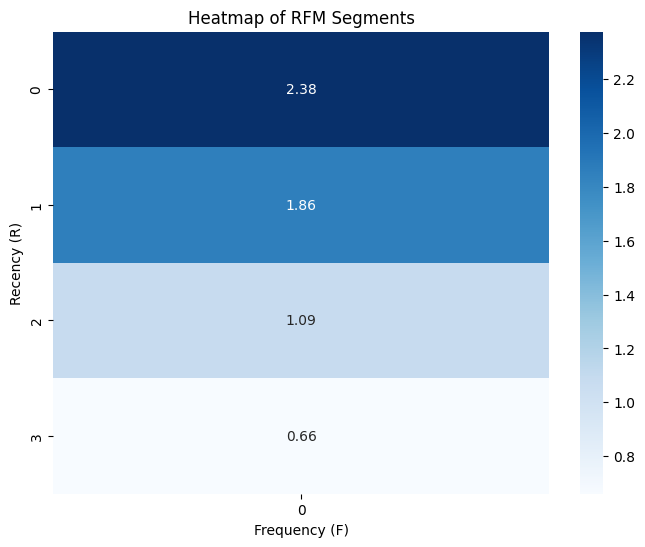

In [28]:
# Menggunakan fitur 'cnt_x' sebagai ukuran 'Monetary' dan melakukan analisis Recency dan Frequency

# Menyiapkan Data
df_combined['dteday'] = pd.to_datetime(df_combined['dteday'])  # Pastikan 'dteday' dalam format datetime
latest_date = df_combined['dteday'].max()  # Menentukan tanggal terakhir
df_combined['recency'] = (latest_date - df_combined['dteday']).dt.days  # Recency: Selisih hari sejak penyewaan terakhir

# Frequency: Menghitung jumlah penyewaan per tanggal
df_combined['frequency'] = df_combined.groupby('dteday')['cnt_x'].transform('count')

# Monetary: Jumlah penyewaan yang dilakukan (total penyewaan per tanggal)
df_combined['monetary'] = df_combined.groupby('dteday')['cnt_x'].transform('sum')

# Melihat beberapa data pertama
print(df_combined[['dteday', 'recency', 'frequency', 'monetary']].head())

# Menyaring data untuk analisis lebih lanjut
rfm_data = df_combined[['recency', 'frequency', 'monetary']].dropna()

# Analisis RFM: Menyaring berdasarkan kuartil
recency_quartiles = pd.qcut(rfm_data['recency'], 4, labels=False)
# Menggunakan duplicates='drop' untuk menghindari duplikat bin
frequency_quartiles = pd.qcut(rfm_data['frequency'], 4, labels=False, duplicates='drop')
monetary_quartiles = pd.qcut(rfm_data['monetary'], 4, labels=False, duplicates='drop')

# Gabungkan ketiga kuartil
rfm_data['R'] = recency_quartiles
rfm_data['F'] = frequency_quartiles
rfm_data['M'] = monetary_quartiles

# Menampilkan hasil RFM analysis
print(rfm_data.head())

# Membuat pivot table
rfm_pivot = rfm_data.pivot_table(index='R', columns='F', values='M', aggfunc='mean')

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title("Heatmap of RFM Segments")
plt.xlabel("Frequency (F)")
plt.ylabel("Recency (R)")
plt.show()

**Insight:**
- Recency: Semua pelanggan memiliki 730 hari sejak transaksi terakhir, menunjukkan ketidakaktifan dalam waktu lama.
- Frequency: Semua pelanggan memiliki 24 penyewaan, menunjukkan jumlah transaksi yang tetap sama.
- Monetary: Total 985 penyewaan dihasilkan per hari, menunjukkan nilai transaksi yang konsisten.
- RFM Segmen: Nilai R = 3, F = 0, dan M = 0, menunjukkan pelanggan yang jarang bertransaksi dan dengan nilai transaksi rendah.

## Conclusion

- Conclution pertanyaan 1: Cuaca, musim, dan waktu dalam sehari memiliki pengaruh yang signifikan terhadap jumlah sepeda yang disewa. Musim panas dan musim gugur cenderung memiliki penyewaan yang lebih tinggi, sementara cuaca buruk mengurangi minat untuk menyewa sepeda.
- Conclution pertanyaan 2: Terdapat perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan hari libur, dengan hari kerja cenderung memiliki lebih banyak penyewaan sepeda dibandingkan hari libur.